In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Import Dataset**

In [2]:
df =pd.read_csv ('/home/jovyan/online_shoppers_intention.csv')

**Dataset Description**

In [3]:
print (df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [4]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

*Most of the dataset attributes are numerical, either integers or floats; Revenue(the class label) and Weekend are boolean type*

**Statistical Analysis of the Dataset**


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Count value of Revenue attribute to verify imbalance**

In [7]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

**Missing values in Dataset**

In [8]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**This dataset doesn't have missing values, no actions are needed**

**Data type transformation**

In [9]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

*The attributes Revenue and Weekend were changed from boolean into binary, use them more easily for calculations*

In [10]:
d_month = {'Jan':1,'Feb':2, 'Mar':3,'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11, 'Dec':12}
d_visitor = {'Returning_Visitor': 1,'New_Visitor':2, 'Other':3}
df.Month = df.Month.map(d_month)
df.VisitorType = df.VisitorType.map(d_visitor)

*The attributes Month and Visitor were changed from object into int*

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Correlation Analysis**

In [12]:
data_correlation = df.corr()
print(data_correlation)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Month                          0.096713                 0.057885   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487         

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


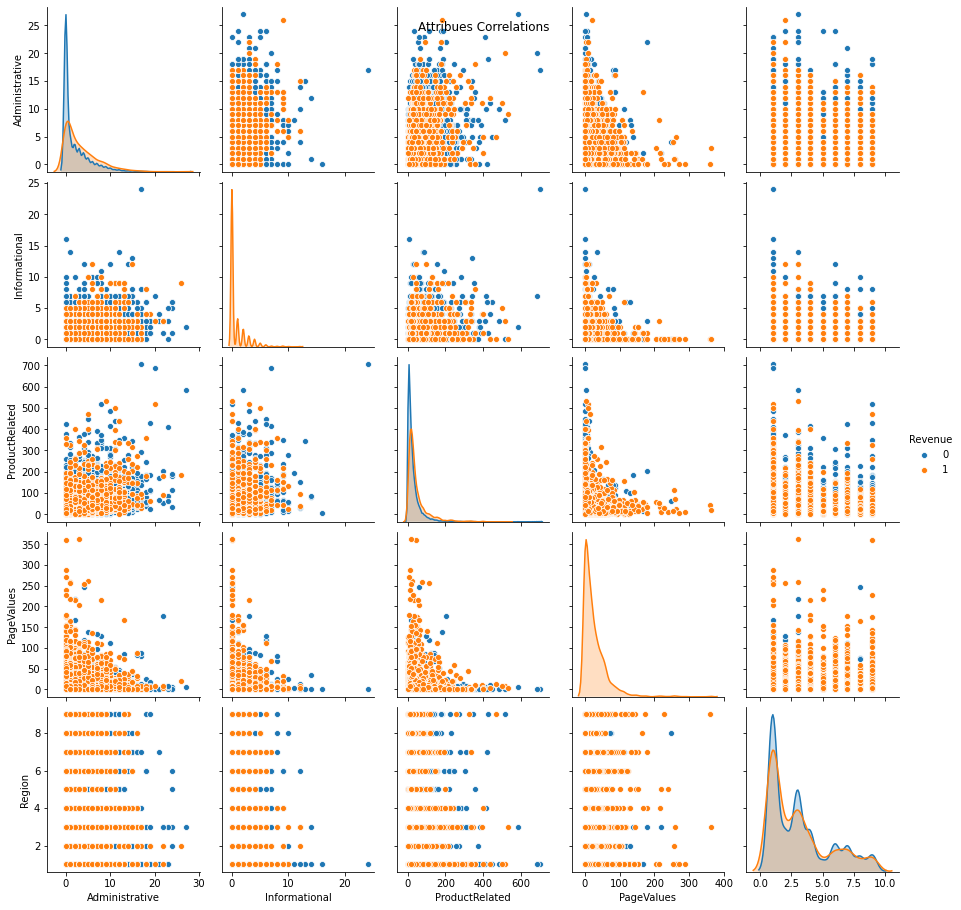

In [13]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Region','Revenue']], hue='Revenue')
g1.fig.suptitle('Attribues Correlations')
plt.show()

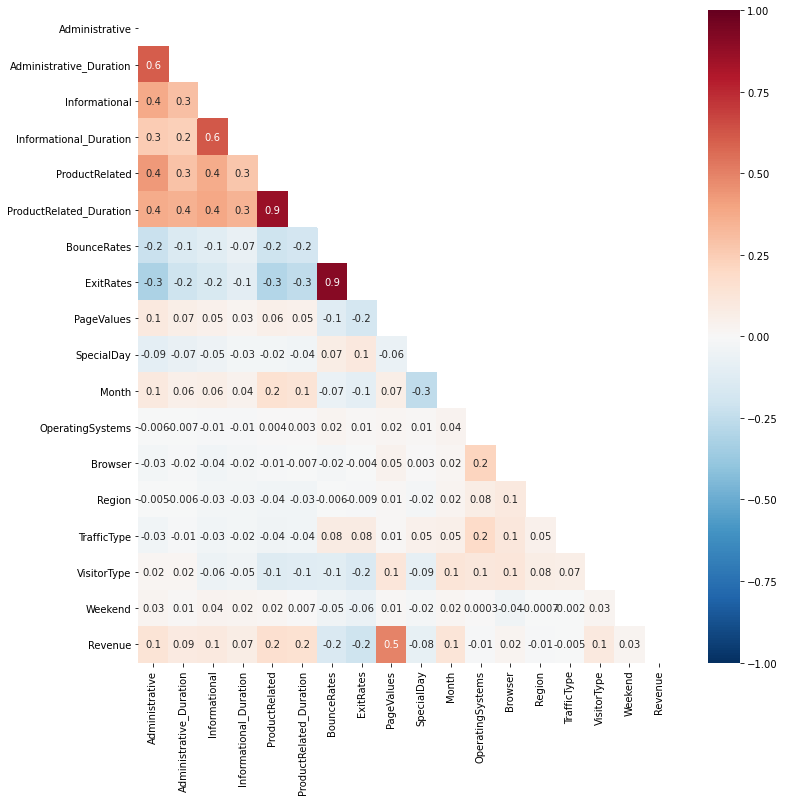

In [14]:
matrix = np.triu(data_correlation)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

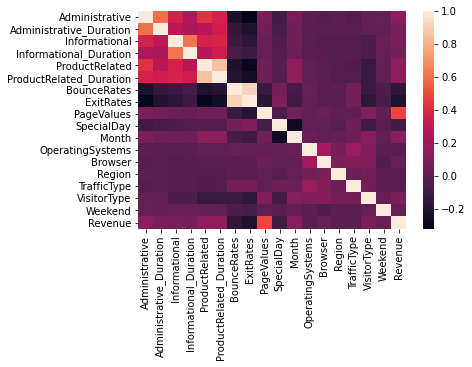

In [15]:
corr =data_correlation
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

*From the above correlation analysis we can infer the following:*

- There are only a couple of attributes that have a high correlation of 0.9 with eachother:
    - ProductRelated and ProductRelated_Duration 
    - ExitRates and BounceRates 
- In addition, the following attributes have a moderate correlation:
    - PageValues and Revenue have a correlation of 0.5
    - Administrative and Administrative_Duration & Informational and Informational_Duration have a  correlation of 0.6

**Boxplot of attributes**

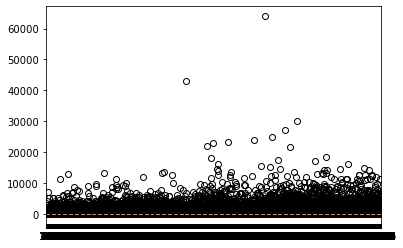

In [48]:
plt.boxplot(df)
 
# show plot
plt.show()

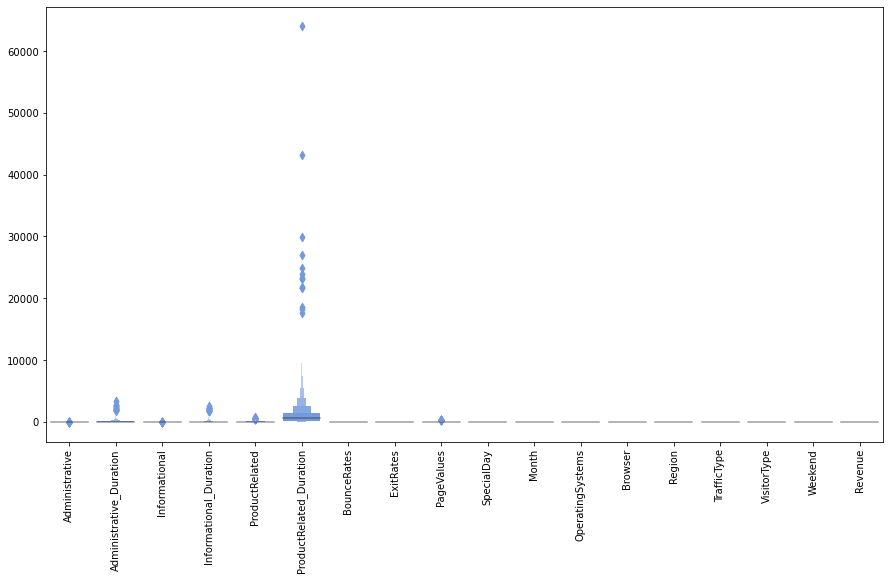

In [16]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = df,color = "cornflowerblue")
plt.xticks(rotation=90)
plt.show()

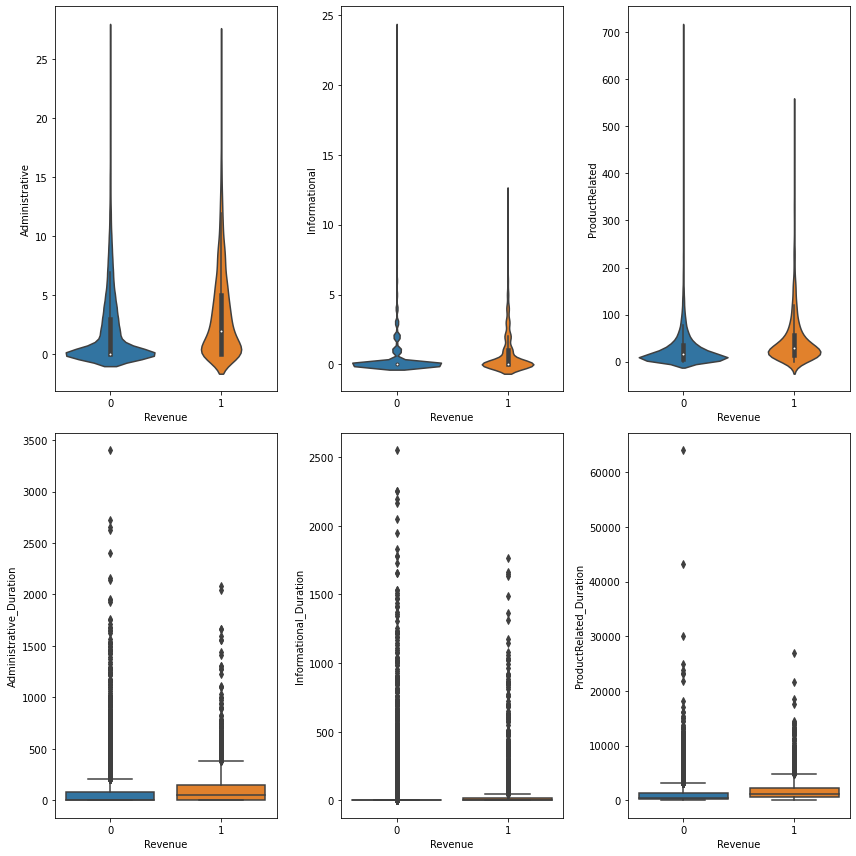

In [17]:

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)


plt.tight_layout()
plt.show()

**Histogram of attributes**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


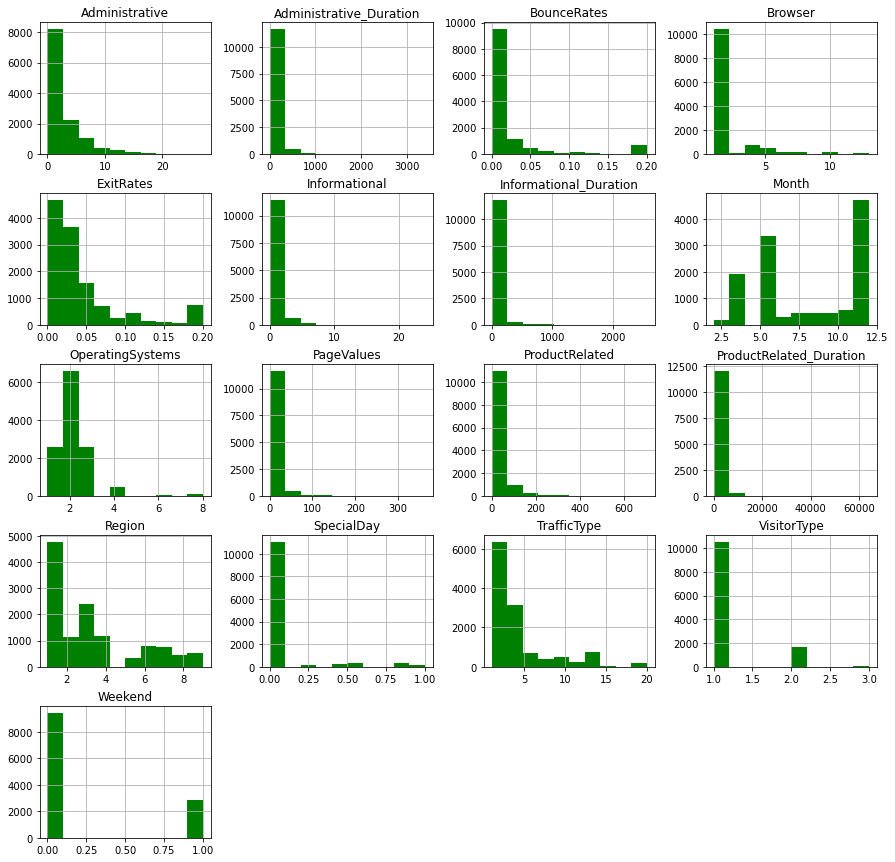

In [18]:
df_X = df.drop(columns=['Revenue'])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_X.hist(ax=ax, color = 'green')
plt.show()

Distribution for Region attribute

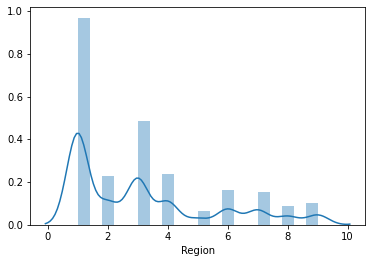

In [19]:
sns.distplot(df['Region'], bins=20)
plt.show()

Save dataset with modified values to new cvs file

In [20]:
df.to_csv('Onlineshoppersdata(1).csv', index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Feature Selection using SULOV**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(0)

In [43]:
X = df.drop(['Revenue'],axis=1)
 
y = df.Revenue.values 

In [44]:
X_scaled =  StandardScaler().fit_transform(X) 

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [46]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.9042984590429846

**The model accuracy is 90.4% when we use 15 features available in the dataset**

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (12330, 18)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 17
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 17 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time..

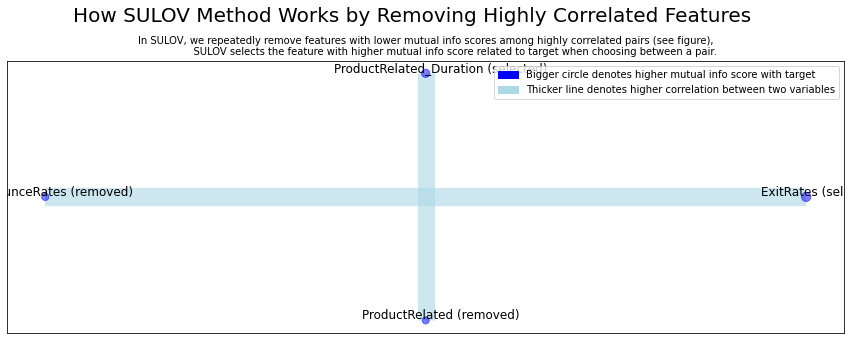

    Adding 0 categorical variables to reduced numeric variables  of 15
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 15 
    Finding Important Features using Boosted Trees algorithm...
        using 15 variables...
        using 12 variables...
        using 9 variables...
        using 6 variables...
        using 3 variables...
Selected 15 important features from your dataset
    Time taken (in seconds) = 8
Returning list of 15 important features and dataframe.


In [47]:
# automatic feature selection by using featurewiz package
target = 'Revenue'
 
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [29]:
print(features)

['PageValues', 'Month', 'VisitorType', 'ExitRates', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'SpecialDay', 'Informational_Duration', 'Informational', 'TrafficType', 'Weekend', 'OperatingSystems', 'Region', 'Browser']


In [30]:
#split data into feature and target
X_new = train.drop(['Revenue'],axis=1)
 
y = train.Revenue.values 

In [31]:
# preprocessing the features 
X_scaled =  StandardScaler().fit_transform(X_new)

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [33]:
# create and train classifier 
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.9038929440389294

**The model accuracy is 90.4%  when we use 15 features available in the dataset.**

The model is slightly less accurate when we remove ['ProductRelated', 'BounceRates'] from the list of attributes

**Feature selection using Feature Importance **

In [35]:

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop(['Revenue'],axis=1)
 
Y = df.Revenue.values 

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)


[0.05226378 0.04671617 0.03030758 0.02753855 0.06286233 0.06242504
 0.05138329 0.08764385 0.33958835 0.00712517 0.05329012 0.03190448
 0.03203385 0.0436111  0.04254451 0.01462526 0.01413659]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Feature selection using Univariate Selection**

In [37]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop(['Revenue'],axis=1)
 
Y = df.Revenue.values 

bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best featu

                      Specs          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
10                    Month     300.903189
9                SpecialDay      53.797094
6               BounceRates      29.654336
7                 ExitRates      28.985072
15              VisitorType      14.763279
12                  Browser       8.873291
16                  Weekend       8.120464
13                   Region       3.037565
14              TrafficType       1.283194
11         OperatingSystems       1.037132


**After running 3 different feature selection methods, and the three of them ranking the attributes differently. I have decided to not drop any of the attributes to run the Classifiers**